In [9]:
# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# 
data = np.random.binomial(1, .30, 1000)

<AxesSubplot:ylabel='Density'>

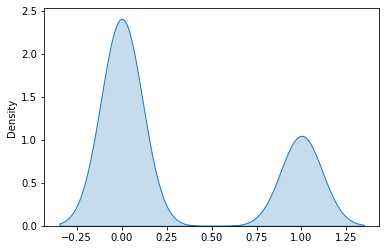

In [11]:
sns.kdeplot(data, shade=True)

In [23]:
# Create cured patients array from 1 to 10
num_patients_cured = np.arange(0,11)

# Create efficacy rate array from 0 to 1 by 0.01
efficacy_rate = np.arange(0,1.01,0.01)

# Combine the two arrays in one DataFrame
df = pd.DataFrame([(x, y) for x in num_patients_cured for y in efficacy_rate])

# Name the columns
df.columns = ["num_patients_cured", "efficacy_rate"]

# Print df
print(df)

      num_patients_cured  efficacy_rate
0                      0           0.00
1                      0           0.01
2                      0           0.02
3                      0           0.03
4                      0           0.04
...                  ...            ...
1106                  10           0.96
1107                  10           0.97
1108                  10           0.98
1109                  10           0.99
1110                  10           1.00

[1111 rows x 2 columns]


/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


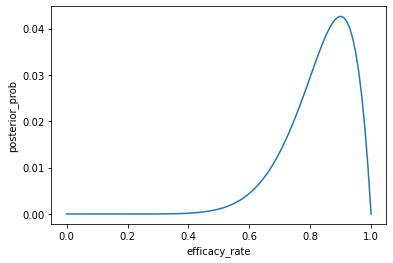

In [35]:
from scipy.stats import uniform, binom
# 
# According to the experiment's outcomes, out of 10 sick patients treated with the drug, 
# 9 have been cured. What can you say about the drug's efficacy rate based on such a small sample? 
# Assume you have no prior knowledge whatsoever regarding how good the drug is.
# 
# Calculate the prior efficacy rate and the likelihood
df["prior"] = uniform.pdf(df["efficacy_rate"])
df["likelihood"] = binom.pmf(df["num_patients_cured"], 10, df["efficacy_rate"])
# 
# Calculate the posterior efficacy rate and scale it to sum up to one
df["posterior_prob"] = df["prior"] * df["likelihood"]
df["posterior_prob"] /= df["posterior_prob"].sum()
# 
# Compute the posterior probability of observing 9 cured patients
df_9_of_10_cured = df.loc[df["num_patients_cured"] == 9]
df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()
# 
# Plot the drug's posterior efficacy rate
sns.lineplot(data = df_9_of_10_cured, x = "efficacy_rate", y ="posterior_prob")
plt.show()

In [38]:
# Assign old posterior to new prior and calculate likelihood
df["new_prior"] = df["posterior_prob"]
df["new_likelihood"] = binom.pmf(df["num_patients_cured"], 12, df["efficacy_rate"])
# 
# Calculate new posterior and scale it
df["new_posterior_prob"] = df["new_prior"] * df["new_likelihood"]
df["new_posterior_prob"] /= df["new_posterior_prob"].sum()
# 
# Compute the posterior probability of observing 10 cured patients
df_10_of_12_cured = df.loc[df["num_patients_cured"] == 10]
df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


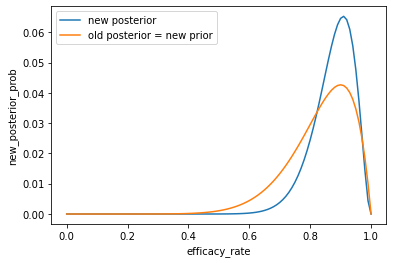

In [39]:
sns.lineplot(df_10_of_12_cured["efficacy_rate"], 
             df_10_of_12_cured["new_posterior_prob"], 
             label="new posterior")
sns.lineplot(df_9_of_10_cured["efficacy_rate"], 
             df_9_of_10_cured["posterior_prob"], 
             label="old posterior = new prior")
plt.show()

<AxesSubplot:ylabel='Density'>

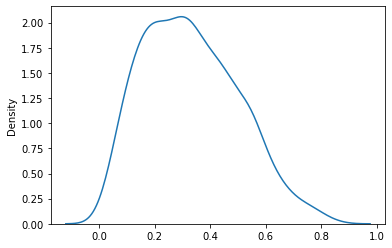

In [41]:
# Simulation:
draws = np.random.beta(2,4,1_000)
# 
sns.kdeplot(draws)

### Simulating posterior draws
- Beta(5, 2) prior for the efficacy rate. You are also using the binomial distribution to model the data (curing a sick patient is a "success", remember?). Since the beta distribution is a conjugate prior for the binomial likelihood, you can simply simulate the posterior!
- *Beta(a,b)*, then the posterior is *Beta(x,y)*, with:
    - *x = NumberOfSuccesses + a*
    - *y = NumberOfObservations - NumberOfSuccesses + b*
- Can you simulate the posterior distribution? Recall that altogether you have data on 22 patients, 19 of whom have been cured.

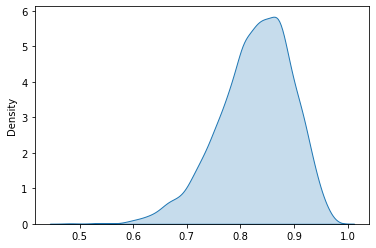

In [45]:
# Simulating posterior draws
# Define the number of patients treated and cured
num_patients_treated = 22
num_patients_cured = 19

# Simulate 10000 draws from the posterior distribuition
posterior_draws = np.random.beta(num_patients_cured + 5, num_patients_treated - num_patients_cured + 2, 10000)

# Plot the posterior distribution
sns.kdeplot(posterior_draws, shade=True)
plt.show()